# <span style="color:Maroon">US Mortality Rate Analysis by Cuase, State and Gender

<span style="color:Green">__Overview:__ In this notebook, we analyse the mortality rates in USA by State, Gender, and Cause. IHME research applied a novel methodology to death registration data from the National Vital Statistics System (NVSS) in order to estimate annual county-level mortality rates for 21 mutually exclusive causes of death. This dataset provides estimates for cause-specific age-standardized mortality rates at the county-level for each state, the District of Columbia, and the United States as a whole for 1980-2014 (quinquennial), as well as the changes in rates during this period. Also included are data on the ten counties with the highest and lowest mortality rates for each cause in 2014. Study results were published in JAMA in December 2016 in "US county-level trends in mortality rates for major causes of death, 1980–2014."       

<span style="color:Green">__Citation:__ Institute for Health Metrics and Evaluation (IHME). United States Mortality Rates by County 1980-2014. Seattle, United States: Institute for Health Metrics and Evaluation (IHME), 2016.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import os as os
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import itertools

## <span style="color:Maroon">Declare Variables

In [2]:
# Change to data directory
os.chdir("..//Data//")

In [3]:
# Declare directories with the data files
country_category_year = "country_category_year"
labels = "labels"
state_category_year = "state_category_year"
states_gender_year_cause = "states_gender_year_cause"

In [4]:
# Declare filenames based on type of data
file_county = "IHME_USA_COUNTY_MORTALITY_RATES_1980_2014_NATIONAL_Y2016M12D13.xlsx"
file_label = "IHME_USA_COUNTY_MORTALITY_RATES_1980_2014_CODEBOOK_Y2017M05D19.csv"
file_st_ct_yr1 = "IHME_USA_COUNTY_MORTALITY_RATES_1980_2014_"
file_st_ct_yr2 = "_Y2016M12D13"
file_st_gn_yr_cs1 = "IHME_USA_COUNTY_MORTALITY_RATES_1980_2014_"
file_st_gn_yr_cs2 = "_Y2017M05D19"

In [5]:
# List with state names
states = ["ALABAMA", "ALASKA", "ARIZONA", "ARKANSAS", "CALIFORNIA", "COLORADO", "CONNECTICUT", "DELAWARE", 
          "DISTRICT_OF_COLUMBIA", "FLORIDA", "GEORGIA", "HAWAII", "IDAHO", "ILLINOIS", "INDIANA", "IOWA", "KANSAS",
          "KENTUCKY", "LOUISIANA", "MAINE", "MARYLAND", "MASSACHUSETTS", "MICHIGAN", "MINNESOTA", "MISSISSIPPI", 
          "MISSOURI", "MONTANA", "NEBRASKA", "NEVADA", "NEW_HAMPSHIRE", "NEW_JERSEY", "NEW_MEXICO", "NEW_YORK", 
          "NORTH_CAROLINA", "NORTH_DAKOTA", "OHIO", "OKLAHOMA", "OREGON", "PENNSYLVANIA", "RHODE_ISLAND", 
          "SOUTH_CAROLINA", "SOUTH_DAKOTA", "TENNESSEE", "TEXAS", "UTAH", "VERMONT", "VIRGINIA", "WASHINGTON",
          "WEST_VIRGINIA", "WISCONSIN", "WYOMING"]

In [6]:
# List with different categories
categories = ["HIV-AIDS & tuberculosis", "Diarrhea, lower respiratory", "Neglected tropical diseases", 
              "Maternal disorders", "Neonatal disorders", "Nutritional deficiencies", "Other communicable, maternal, ",
              "Neoplasms", "Cardiovascular diseases", "Chronic respiratory diseases", "Cirrhosis & other chronic ",
              "Digestive diseases", "Neurological disorders", "Mental & substance use ", "Diabetes, urogenital, blood",
              "Musculoskeletal disorders", "Other non-communicable ", "Transport injuries", "Unintentional injuries",
              "Self-harm & interpersonal ", "Forces of nature, war, & legal "]

In [7]:
country = "UNITED_STATES"

## <span style="color:Maroon">Read Label file and Mortality Rates data 

In [8]:
# Read label file
os.chdir(f".//{labels}")
labels_data = pd.read_csv(file_label,skiprows=1)

In [9]:
# Used to map the Numeric ID to the cause name
def cause_id_mapping(key):
    keys = np.array(labels_data['Cause ID'])
    vals = list(labels_data['Cause name'])
    i, = np.where(keys == key)
    return vals[i[0]]

In [10]:
# Read mortality data with state, gender, year and cause
os.chdir(f'..//{states_gender_year_cause}')
df_states_gender_year_cause = pd.read_csv(file_st_gn_yr_cs1+country+file_st_gn_yr_cs2+".csv")

## <span style="color:Maroon"> Mortality analysis by Gender (At Country level)

In [11]:
# Divide the data based on gender
df_states_gender_year_cause_allgenders =df_states_gender_year_cause[df_states_gender_year_cause["sex"]=="Both"].copy()
df_states_gender_year_cause_malesonly = df_states_gender_year_cause[df_states_gender_year_cause["sex"]=="Male"].copy()
df_states_gender_year_cause_femalesonly = df_states_gender_year_cause[df_states_gender_year_cause["sex"]=="Female"].copy()

In [12]:
# Get the Mortality rates by county and year
year = np.array(df_states_gender_year_cause_allgenders[df_states_gender_year_cause_allgenders["cause_name"]==
                                                       "All causes"][["year_id","mx"]]["year_id"])
allgenders_mx = np.array(df_states_gender_year_cause_allgenders[df_states_gender_year_cause_allgenders["cause_name"]==
                                                                "All causes"][["year_id","mx"]]["mx"])
female_mx = np.array(df_states_gender_year_cause_femalesonly[df_states_gender_year_cause_femalesonly["cause_name"]==
                                                             "All causes"][["year_id","mx"]]["mx"])
male_mx = np.array(df_states_gender_year_cause_malesonly[df_states_gender_year_cause_malesonly["cause_name"]==
                                                         "All causes"][["year_id","mx"]]["mx"])

In [13]:
# Change to Images folder
os.chdir("..")
os.chdir("..//Images")

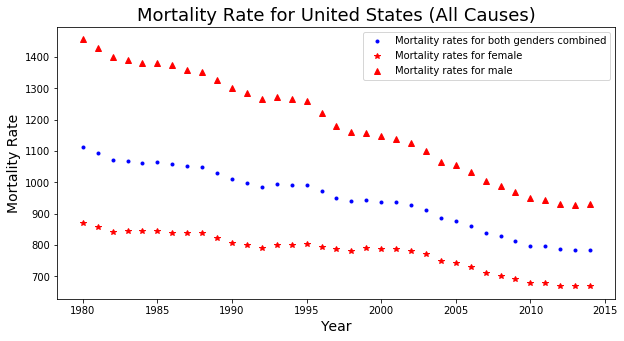

In [14]:
plt.figure(figsize=(10,5))
plt.plot(year,allgenders_mx,'.b',label="Mortality rates for both genders combined")
plt.plot(year,female_mx,'*r',label="Mortality rates for female")
plt.plot(year, male_mx,'^r',label="Mortality rates for male")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mortality Rate", fontsize=14)
plt.title("Mortality Rate for United States (All Causes)", fontsize=18)
plt.legend(fontsize=10)
plt.savefig("Mortality Rates for US (By gender).png")
plt.show()

<span style="color:Blue">__Comments:__ Mortality rates have dropped significantly for United States from 1980s to 2014. Males still have a higher mortality rate than the combined population.

## <span style="color:Maroon">Top Mortality Causes at Country level

In [15]:
def transpose_data(x, y, filter_var, data, ref_cat_val=294):
    """Transpose a dataset, with x as index, y as columns and filter_var to slice and dice the data"""
    vals = np.unique(np.array(data[filter_var]))
    ref_cat = np.array([ref_cat_val])
    vals = np.setdiff1d(vals,ref_cat)
    t1 = ((data[data[filter_var]==vals[0]][[y,x]]).set_index(y))
    t1.columns = [(vals[0])]
    t1 = t1.transpose()
    for i in range(1,len(vals)):
        t2 = ((data[data[filter_var]==vals[i]][[y,x]]).set_index(y))
        t2.columns = [(vals[i])]
        t2 = t2.transpose()
        t1 = t1.append(t2)
    #t1.index.names = ["cause_id"]
    return t1

In [16]:
def calc_metrics(data):
    """
    Calculate the % contribution of each cause in Year 2014
    Calculate change in mortality rate for different causes between year 2014 and 1980
    """
    data = data.sort_values(by=2014, ascending=False)
    data['% Contribution'] = (data[2014]/data[2014].sum())*100
    data['% Change1980-2014'] = ((data[2014] - data[1980])/data[1980])*100
    return data

In [17]:
def Top_or_Bottom(data, var, order, N):
    """Returns top or bottom N items for 'var' variable from data"""
    tmp = data.copy()
    tmp = tmp.sort_values(by=var, ascending=bool(order))
    tmp = tmp.head(N)[var]
    cause_id = np.array(tmp.index)
    cause_names = [None]*cause_id.size
    for i in range(0,cause_id.size):
        cause_names[i] = cause_id_mapping(cause_id[i])
    tmp = pd.DataFrame(tmp)
    tmp["Cause ID"] = tmp.index
    tmp["Cause Name"] = cause_names
    tmp = tmp.reset_index(drop=True)
    return tmp

In [18]:
def print_details(data, str1, str2):
    print("++++++++++++++++++++++++++++++++++++++++++++")
    print(str(str1)+" for Mortality in " + str(str2)+" are:")
    display(HTML(data.to_html(index=False)))
    print("\n\n")

In [19]:
Combined_type_by_yr = transpose_data("mx","year_id","cause_id",df_states_gender_year_cause_allgenders, 294)
Male_type_by_yr = transpose_data("mx","year_id","cause_id",df_states_gender_year_cause_malesonly, 294)
Female_type_by_yr = transpose_data("mx","year_id","cause_id",df_states_gender_year_cause_femalesonly, 294)

In [20]:
Combined_type_by_yr = calc_metrics(Combined_type_by_yr)
Male_type_by_yr = calc_metrics(Male_type_by_yr)
Female_type_by_yr = calc_metrics(Female_type_by_yr)

In [21]:
combined_top_causes = Top_or_Bottom(Combined_type_by_yr,"% Contribution",0,5)
male_top_causes = Top_or_Bottom(Male_type_by_yr,"% Contribution",0,5)
female_top_causes = Top_or_Bottom(Female_type_by_yr,"% Contribution",0,5)

In [22]:
str1 = "Top 5 causes"
print_details(combined_top_causes,str1,"US Population")
print_details(male_top_causes,str1,"US Males")
print_details(female_top_causes,str1, "US Females")

++++++++++++++++++++++++++++++++++++++++++++
Top 5 causes for Mortality in US Population are:


% Contribution,Cause ID,Cause Name
44.233026,409,Non-communicable diseases
15.923330,491,Cardiovascular diseases
12.100924,410,Neoplasms
6.008843,542,Neurological disorders
3.521814,586,"Diabetes, urogenital, blood, and endocrine diseases"





++++++++++++++++++++++++++++++++++++++++++++
Top 5 causes for Mortality in US Males are:


% Contribution,Cause ID,Cause Name
43.572549,409,Non-communicable diseases
15.989049,491,Cardiovascular diseases
12.495839,410,Neoplasms
4.842448,542,Neurological disorders
4.049257,687,Injuries





++++++++++++++++++++++++++++++++++++++++++++
Top 5 causes for Mortality in US Females are:


% Contribution,Cause ID,Cause Name
45.106112,409,Non-communicable diseases
15.796139,491,Cardiovascular diseases
11.944118,410,Neoplasms
7.191806,542,Neurological disorders
3.630300,586,"Diabetes, urogenital, blood, and endocrine diseases"


<span style="color:Blue">__Comments:__ Non-commicable diseases is the top cause of mortality in overall US Population. Gender wise, top four causes of mortality are same. Neurological disorders is almost 1.5 times for females than males. The top 5th cause for mortality for men is "Injuries", whereas for women it is "Diabetes, urogenital, blood and endocrine diseases"

In [23]:
combined_inc_causes = Top_or_Bottom(Combined_type_by_yr,'% Change1980-2014',0,5)
male_inc_causes = Top_or_Bottom(Male_type_by_yr,'% Change1980-2014',0,5)
female_inc_causes = Top_or_Bottom(Female_type_by_yr,'% Change1980-2014',0,5)

In [24]:
str1 = "Top 5 causes which increased"
print_details(combined_inc_causes,str1,"US Population")
print_details(male_inc_causes,str1,"US Males")
print_details(female_inc_causes,str1, "US Females")

++++++++++++++++++++++++++++++++++++++++++++
Top 5 causes which increased for Mortality in US Population are:


% Change1980-2014,Cause ID,Cause Name
188.392306,558,Mental and substance use disorders
74.348946,296,HIV/AIDS and tuberculosis
29.734155,508,Chronic respiratory diseases
29.247451,366,Maternal disorders
24.973543,344,Neglected tropical diseases and malaria





++++++++++++++++++++++++++++++++++++++++++++
Top 5 causes which increased for Mortality in US Males are:


% Change1980-2014,Cause ID,Cause Name
156.098135,558,Mental and substance use disorders
62.445688,296,HIV/AIDS and tuberculosis
46.190035,344,Neglected tropical diseases and malaria
19.498276,586,"Diabetes, urogenital, blood, and endocrine diseases"
16.090767,542,Neurological disorders





++++++++++++++++++++++++++++++++++++++++++++
Top 5 causes which increased for Mortality in US Females are:


% Change1980-2014,Cause ID,Cause Name
261.142898,558,Mental and substance use disorders
95.305125,508,Chronic respiratory diseases
64.166832,296,HIV/AIDS and tuberculosis
30.982418,366,Maternal disorders
21.020457,542,Neurological disorders


<span style="color:Blue">__Comments:__ Looking at the top 5 cases, that have increased over the period of time, "Mental and substance use disorders" have jumped almost 190% (260% for women, compared to 156% for men). For men, "HIV/AIDS and tuberculosis" is the second major cause of increased mortalities, for women it is "Chronic respiratory diseases"

In [25]:
combined_dec_causes = Top_or_Bottom(Combined_type_by_yr,'% Change1980-2014',1,5)
male_dec_causes = Top_or_Bottom(Male_type_by_yr,'% Change1980-2014',1,5)
female_dec_causes = Top_or_Bottom(Female_type_by_yr,'% Change1980-2014',1,5)

In [26]:
str1 = "Top 5 causes which decreased"
print_details(combined_dec_causes,str1,"US Population")
print_details(male_dec_causes,str1,"US Males")
print_details(female_dec_causes,str1, "US Females")

++++++++++++++++++++++++++++++++++++++++++++
Top 5 causes which decreased for Mortality in US Population are:


% Change1980-2014,Cause ID,Cause Name
-79.535567,728,"Forces of nature, war, and legal intervention"
-63.853234,380,Neonatal disorders
-50.195349,491,Cardiovascular diseases
-45.449236,688,Transport injuries
-40.032023,640,Other non-communicable diseases





++++++++++++++++++++++++++++++++++++++++++++
Top 5 causes which decreased for Mortality in US Males are:


% Change1980-2014,Cause ID,Cause Name
-82.420831,728,"Forces of nature, war, and legal intervention"
-65.228181,380,Neonatal disorders
-55.347948,491,Cardiovascular diseases
-48.062508,688,Transport injuries
-40.774052,640,Other non-communicable diseases





++++++++++++++++++++++++++++++++++++++++++++
Top 5 causes which decreased for Mortality in US Females are:


% Change1980-2014,Cause ID,Cause Name
-73.219381,728,"Forces of nature, war, and legal intervention"
-61.951784,380,Neonatal disorders
-45.548424,491,Cardiovascular diseases
-40.019257,688,Transport injuries
-39.174121,640,Other non-communicable diseases


## <span style="color:Maroon">Mortality Trend State level (USA States)

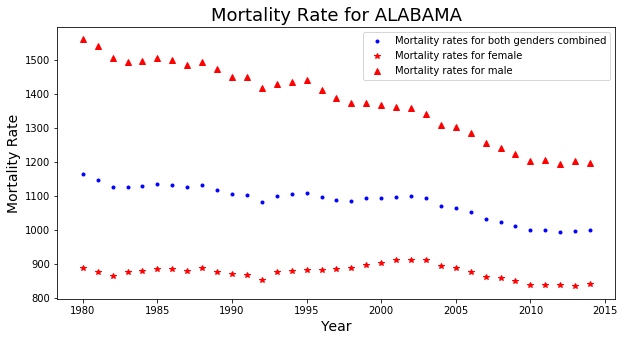

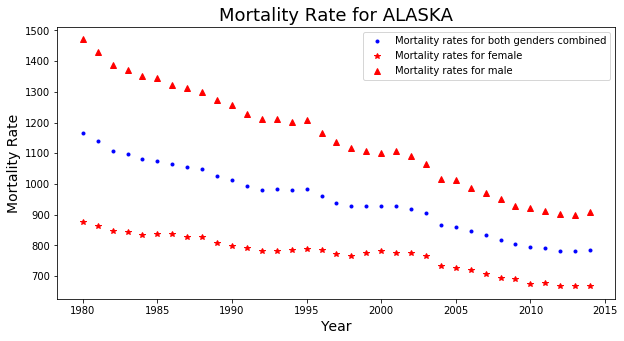

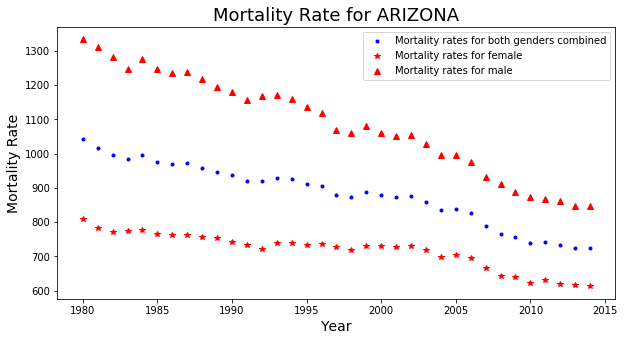

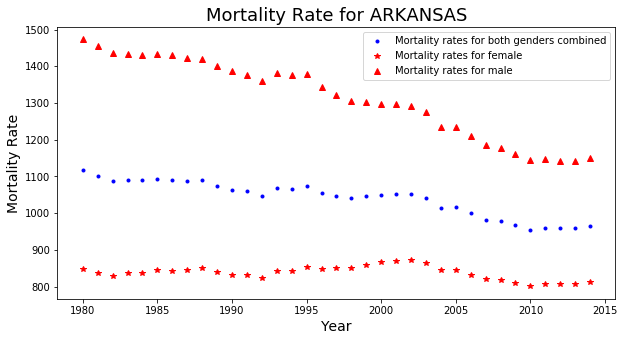

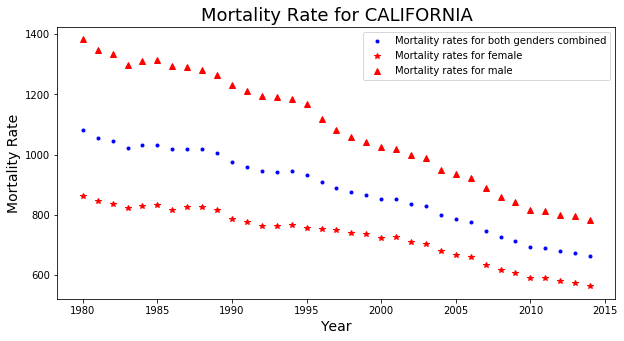

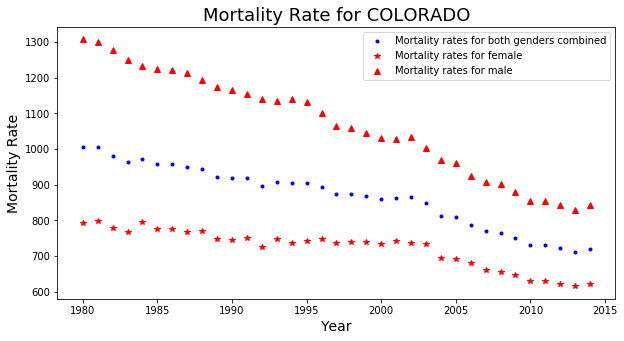

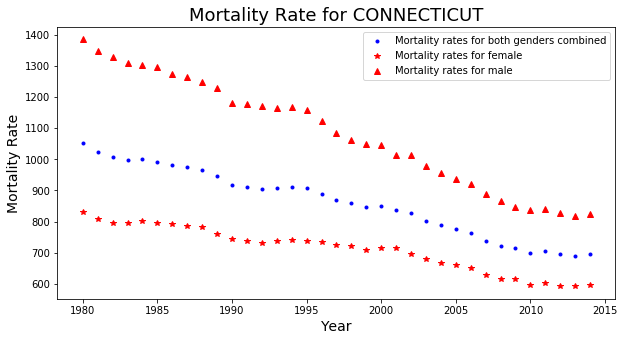

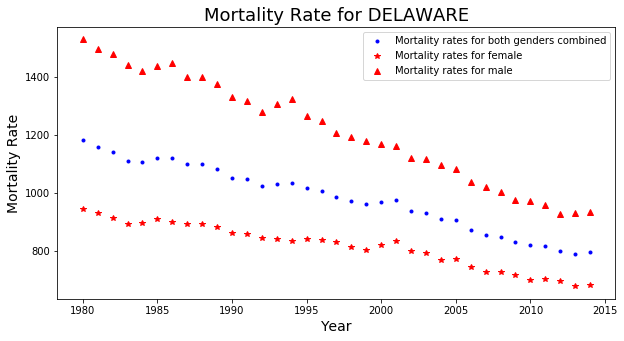

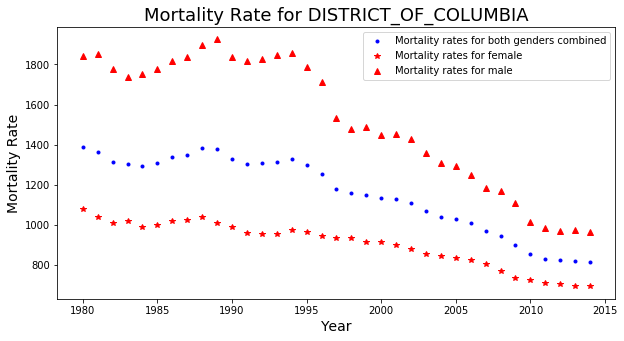

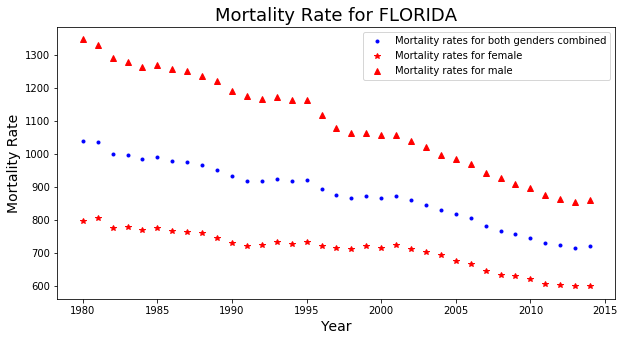

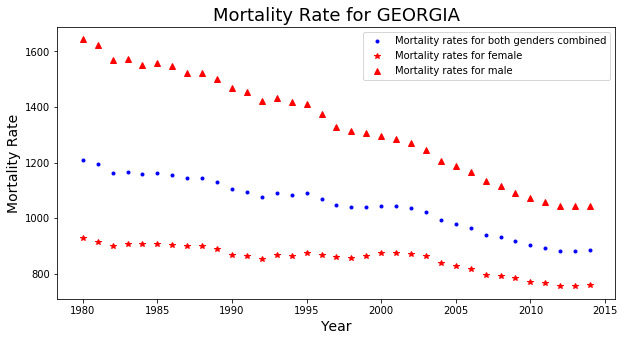

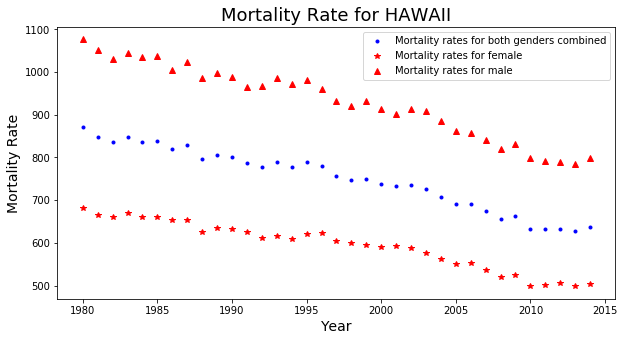

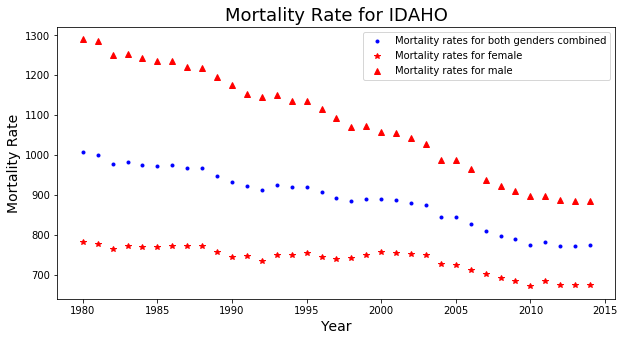

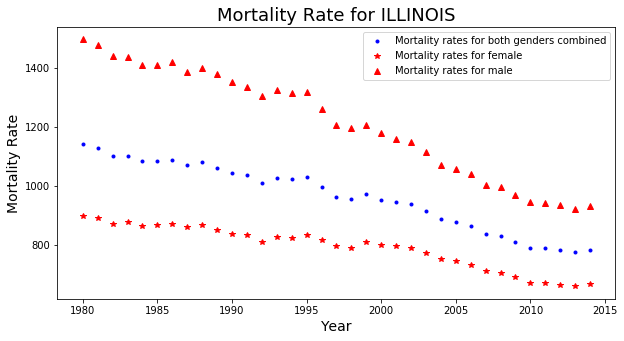

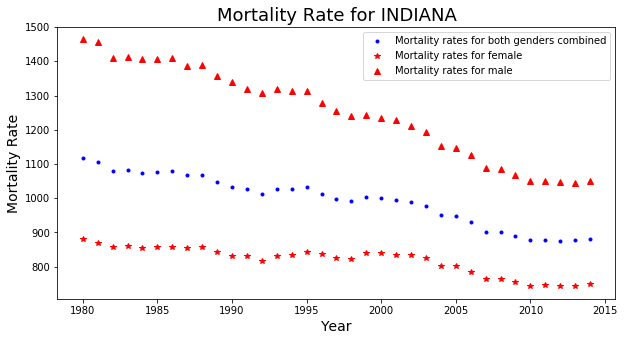

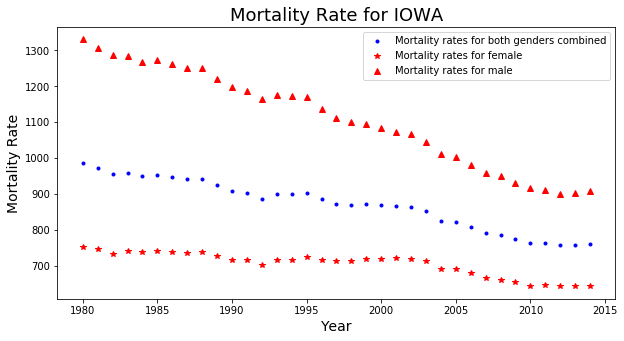

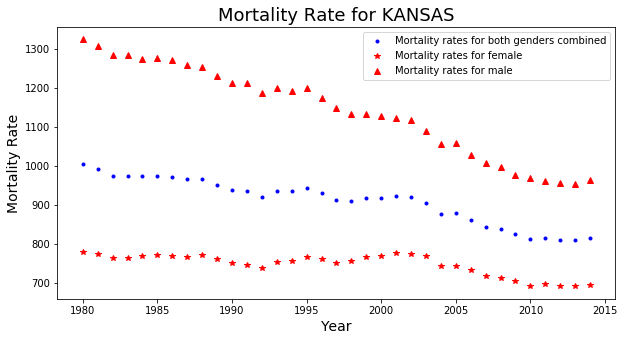

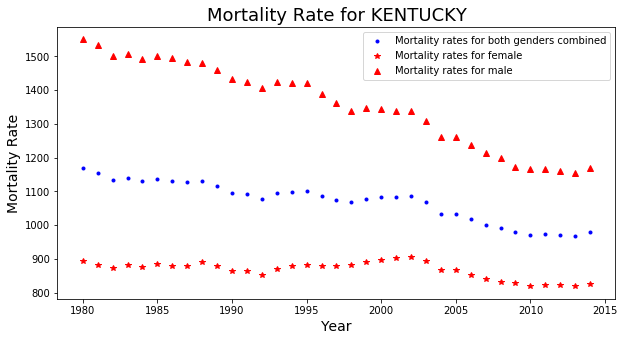

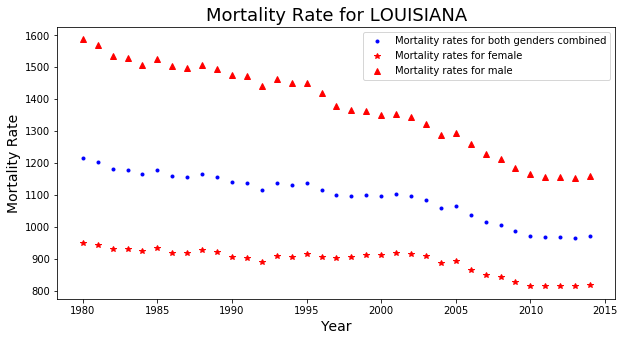

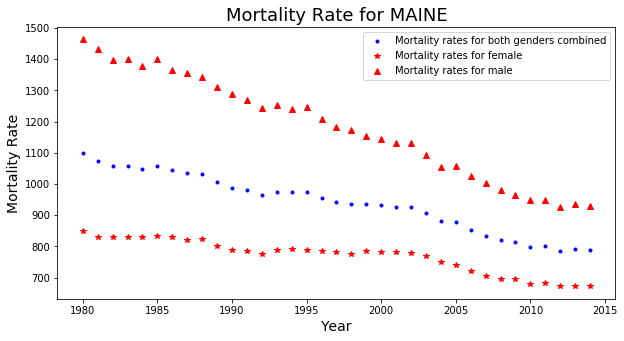

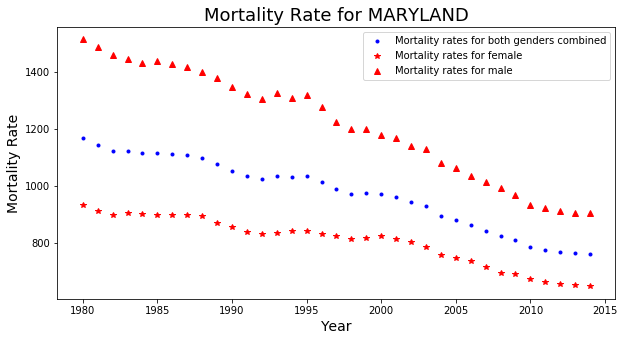

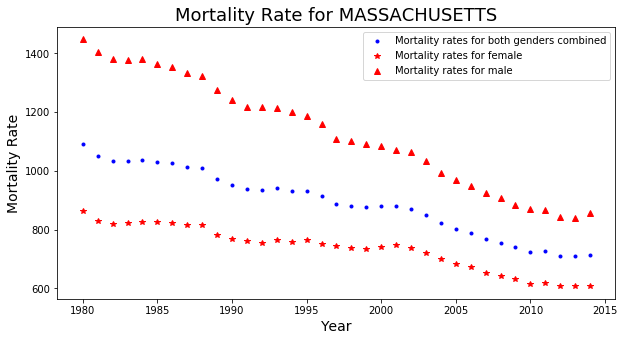

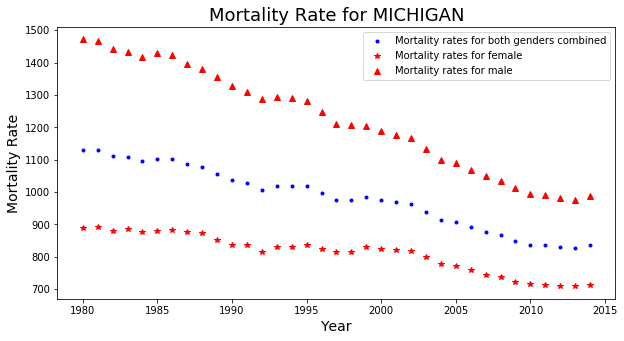

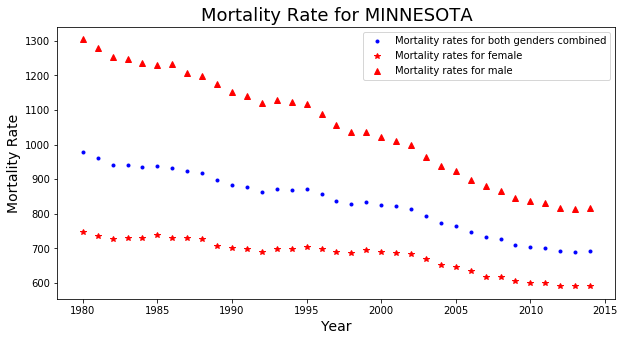

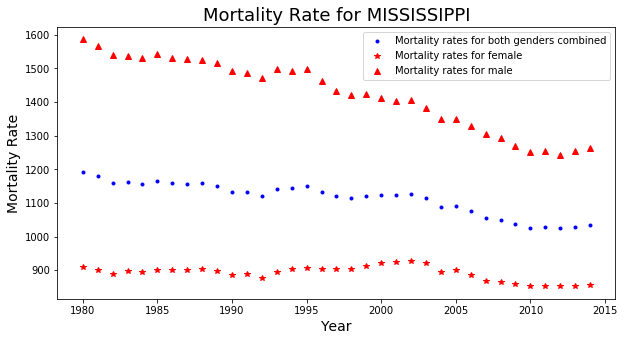

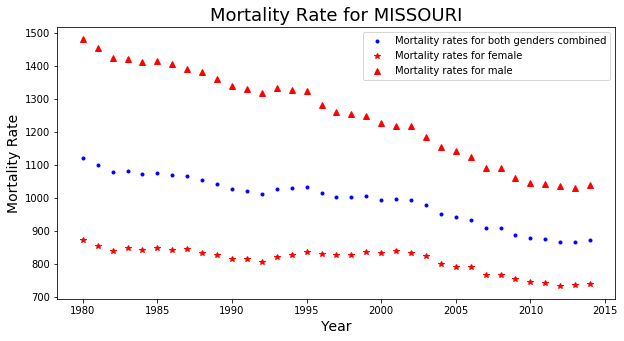

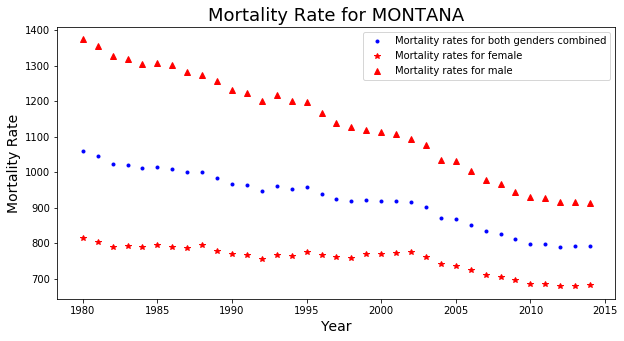

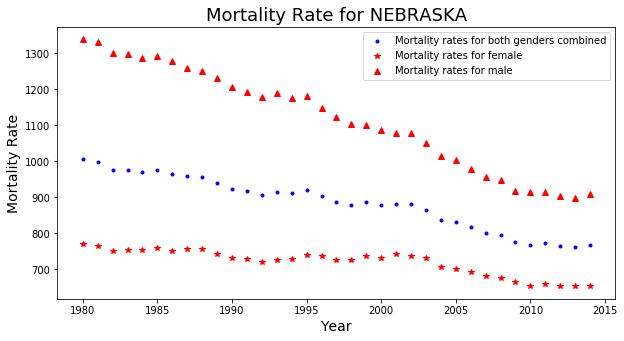

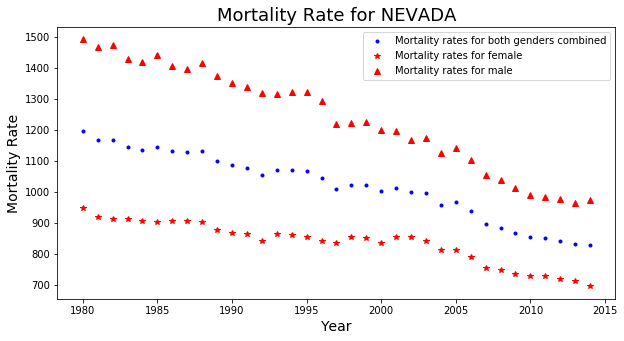

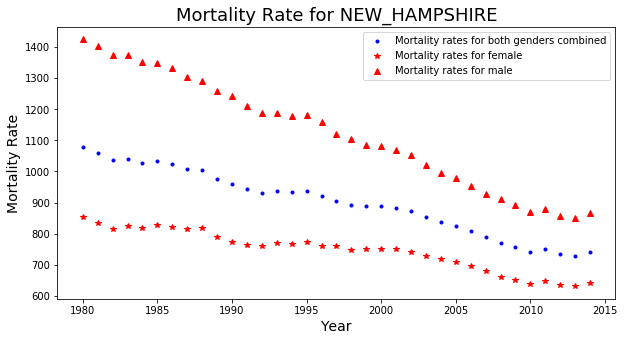

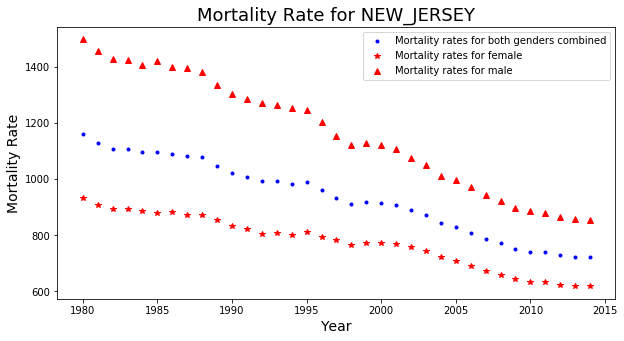

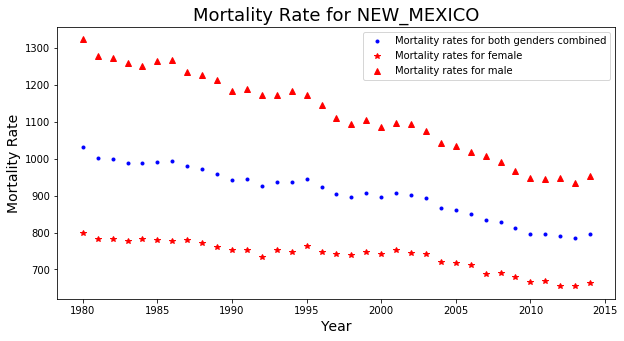

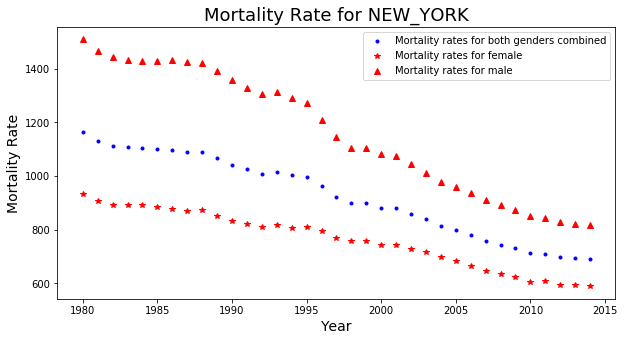

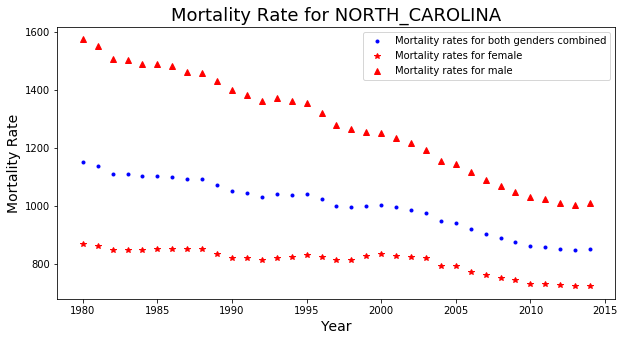

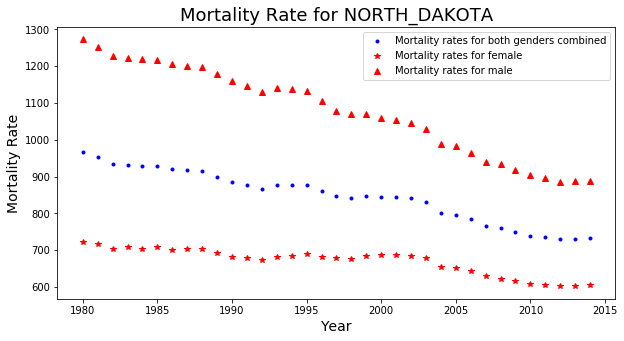

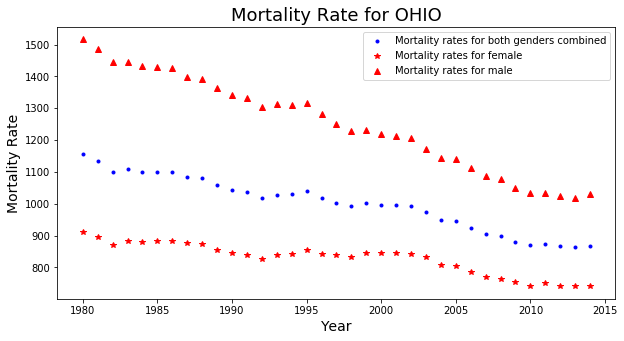

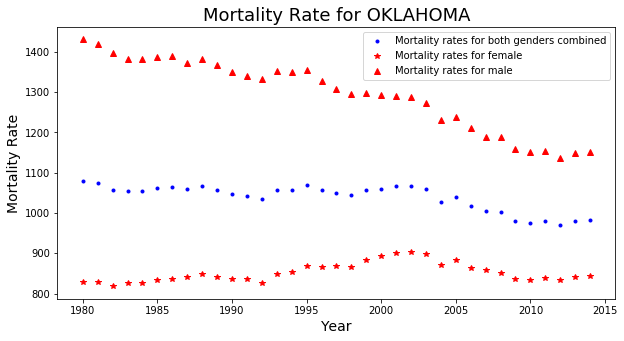

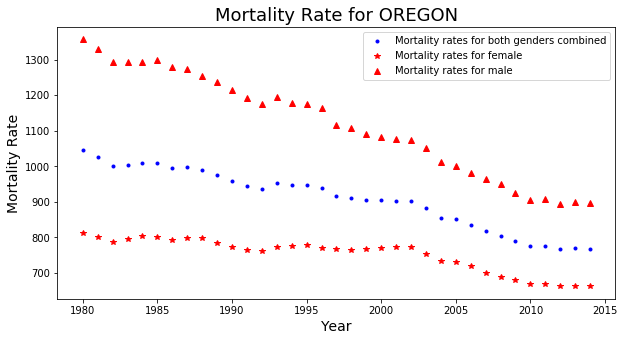

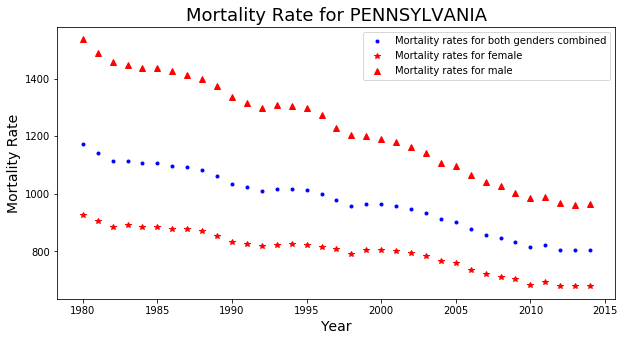

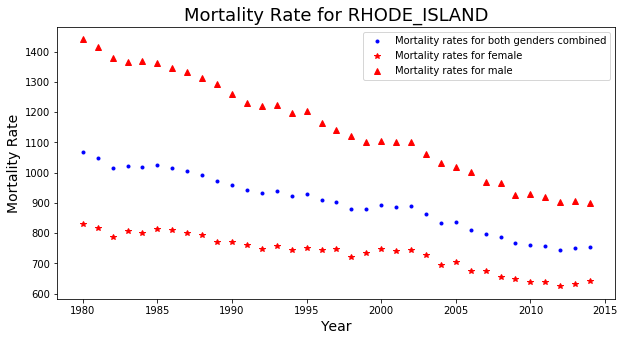

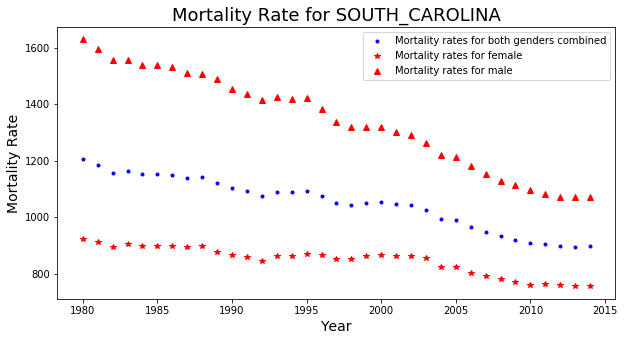

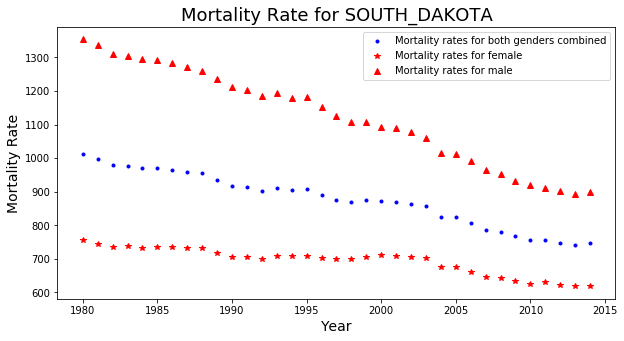

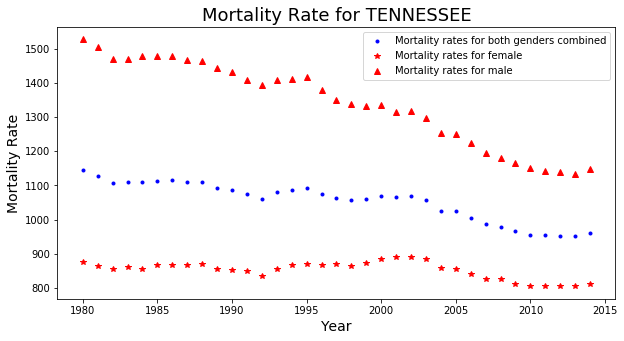

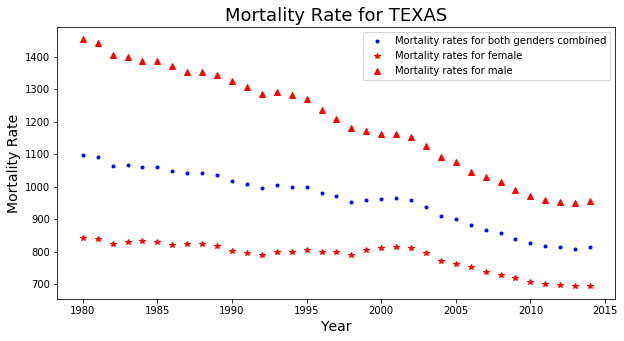

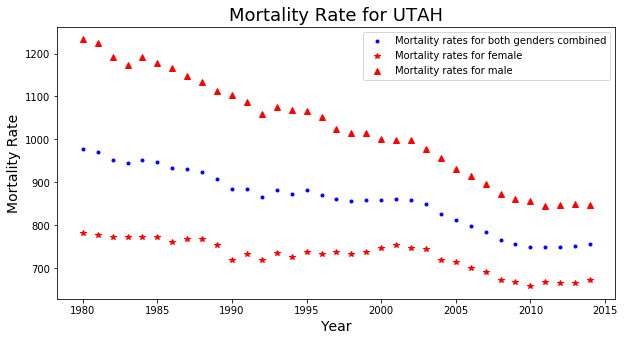

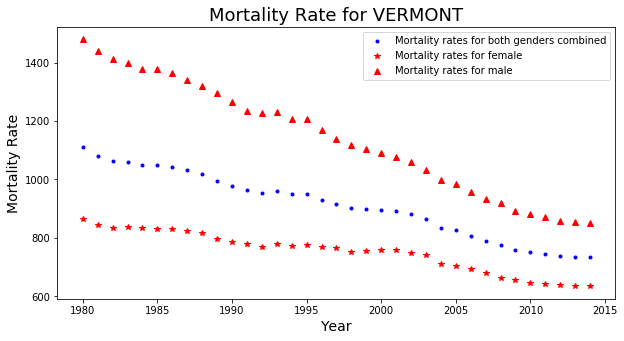

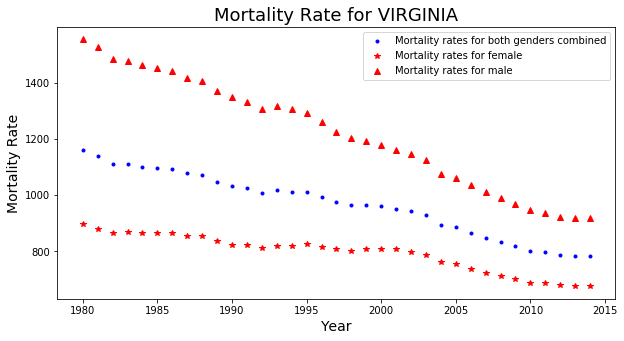

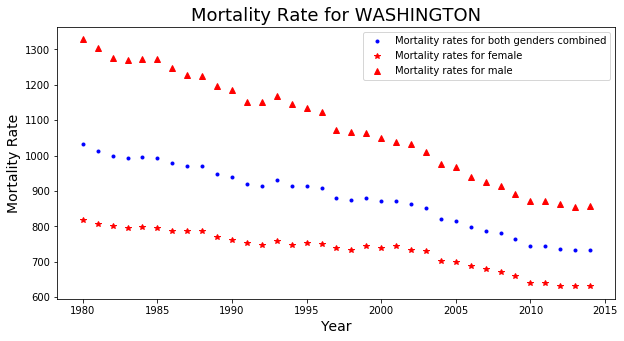

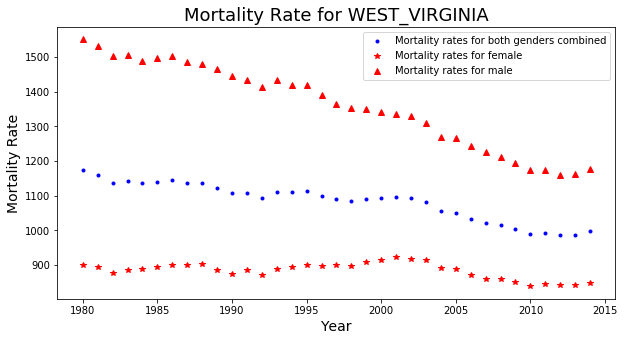

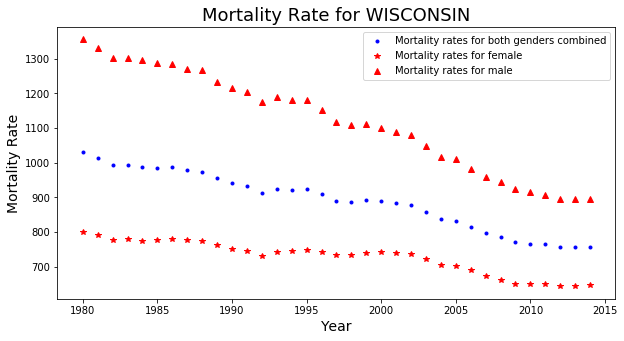

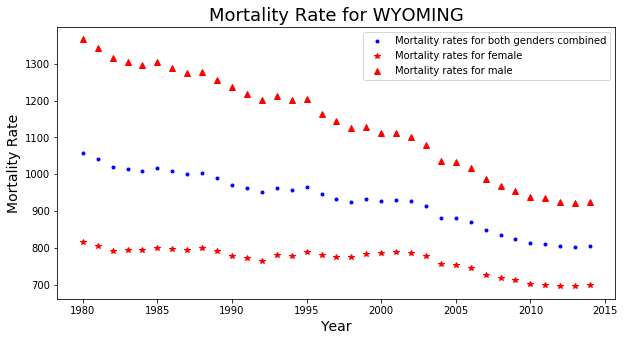

In [27]:
for i in range(0,len(states)):
    os.chdir(f"..//Data//{states_gender_year_cause}")
    data = pd.read_csv(file_st_gn_yr_cs1+states[i]+file_st_gn_yr_cs2+".csv")
    data = data[data["FIPS"]<=100]
    data_combined =data[data["sex"]=="Both"].copy()
    data_Male = data[data["sex"]=="Male"].copy()
    data_Female = data[data["sex"]=="Female"].copy()
    year = np.array(data_combined[data_combined["cause_name"]=="All causes"][["year_id","mx"]]["year_id"])
    mx = np.array(data_combined[data_combined["cause_name"]=="All causes"][["year_id","mx"]]["mx"])
    mx_female = np.array(data_Female[data_Female["cause_name"]=="All causes"][["year_id","mx"]]["mx"])
    mx_male = np.array(data_Male[data_Male["cause_name"]=="All causes"][["year_id","mx"]]["mx"])
    plt.figure(figsize=(10,5))
    plt.plot(year,mx,'.b',label="Mortality rates for both genders combined")
    plt.plot(year,mx_female,'*r',label="Mortality rates for female")
    plt.plot(year, mx_male,'^r',label="Mortality rates for male")
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Mortality Rate", fontsize=14)
    plt.title(f"Mortality Rate for {states[i]}", fontsize=18)
    plt.legend(fontsize=10)
    os.chdir("..")
    os.chdir("..//Images//")
    plt.savefig(f'Mortality Rates {states[i]} overall by Gender.png')
    plt.show()

## <span style="color:Maroon">Top Mortality causes in each state

In [28]:
# Initialize empty dataframes
combined_top_causes = pd.DataFrame()
male_top_causes = pd.DataFrame()
female_top_causes = pd.DataFrame()
combined_inc_causes = pd.DataFrame()
male_inc_causes = pd.DataFrame()
female_inc_causes = pd.DataFrame()
combined_dec_causes = pd.DataFrame()
male_dec_causes = pd.DataFrame()
female_dec_causes = pd.DataFrame()

In [29]:
os.chdir(f"..//Data//{states_gender_year_cause}")
for i in range(0,len(states)):
    data = pd.read_csv(file_st_gn_yr_cs1+states[i]+file_st_gn_yr_cs2+".csv")
    data = data[data["FIPS"]<=100]
    data_combined =data[data["sex"]=="Both"].copy()
    data_Male = data[data["sex"]=="Male"].copy()
    data_Female = data[data["sex"]=="Female"].copy()
    Combined_type_yr = transpose_data("mx","year_id","cause_id",data_combined)
    Male_type_yr = transpose_data("mx","year_id","cause_id",data_Male)
    Female_type_yr = transpose_data("mx","year_id","cause_id",data_Female)
    Combined_type_yr = calc_metrics(Combined_type_yr)
    Male_type_yr = calc_metrics(Male_type_yr)
    Female_type_yr = calc_metrics(Female_type_yr)
    # Select top 1 contributor to mortality in the state
    combined_top_causes = combined_top_causes.append(Top_or_Bottom(Combined_type_yr,"% Contribution",0,2))
    male_top_causes = male_top_causes.append(Top_or_Bottom(Male_type_yr,"% Contribution",0,2))
    female_top_causes = female_top_causes.append(Top_or_Bottom(Female_type_yr,"% Contribution",0,2))
    # Select top 1 contributor to increase in mortality in the state
    combined_inc_causes = combined_inc_causes.append(Top_or_Bottom(Combined_type_yr,'% Change1980-2014',0,1))
    male_inc_causes = male_inc_causes.append(Top_or_Bottom(Male_type_yr,'% Change1980-2014',0,1))
    female_inc_causes = female_inc_causes.append(Top_or_Bottom(Female_type_yr,'% Change1980-2014',0,1))
    # Select bottom 1 contributor to decrease in mortality in the state
    combined_dec_causes = combined_dec_causes.append(Top_or_Bottom(Combined_type_yr,'% Change1980-2014',1,1))
    male_dec_causes = male_dec_causes.append(Top_or_Bottom(Male_type_yr,'% Change1980-2014',1,1))
    female_dec_causes = female_dec_causes.append(Top_or_Bottom(Female_type_yr,'% Change1980-2014',1,1))

In [30]:
new_states = list(itertools.chain.from_iterable([item, item] for item in states))
combined_top_causes['state'] = new_states
male_top_causes['state'] = new_states
female_top_causes['state'] = new_states
combined_inc_causes['state'] = states
male_inc_causes['state'] = states
female_inc_causes['state'] = states
combined_dec_causes['state'] = states
male_dec_causes['state'] = states
female_dec_causes['state'] = states

In [31]:
def plot_pie(dataset, varname, title):
    tmp1 = pd.DataFrame(dataset[varname]).copy()
    tmp1["Flag"] = 1
    tmp1 = (tmp1.groupby([varname]).sum()).reset_index()
    tmp1["Contribution"] = tmp1["Flag"]/tmp1["Flag"].sum()
    labels = list(tmp1[varname])
    size = list(tmp1["Contribution"])
    plt.figure(figsize=(7,7))
    plt.pie(size, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    plt.axis('equal')
    plt.title(title, fontsize=18)
    plt.savefig(f'{title}.png')
    plt.show()

In [32]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [33]:
combined_top_causes = combined_top_causes[["state","Cause Name","Cause ID", "% Contribution"]]
print("Top causes for Mortality in individual states are:")
print(combined_top_causes)

Top causes for Mortality in individual states are:
                  state                 Cause Name  Cause ID  % Contribution
0               ALABAMA  Non-communicable diseases       409       43.641788
1               ALABAMA    Cardiovascular diseases       491       15.598314
0                ALASKA  Non-communicable diseases       409       43.632528
1                ALASKA    Cardiovascular diseases       491       13.889614
0               ARIZONA  Non-communicable diseases       409       43.628484
1               ARIZONA    Cardiovascular diseases       491       14.470362
0              ARKANSAS  Non-communicable diseases       409       43.451790
1              ARKANSAS    Cardiovascular diseases       491       16.790920
0            CALIFORNIA  Non-communicable diseases       409       44.867595
1            CALIFORNIA    Cardiovascular diseases       491       16.522596
0              COLORADO  Non-communicable diseases       409       43.499535
1              COLORADO  

<span style="color:Blue">__Comments:__ "Non Communicable diseases is the top contributor for Mortality in all the states

In [34]:
male_top_causes = male_top_causes[["state","Cause Name","Cause ID", "% Contribution"]]
print("Top causes for Mortality in individual states for males are")
print(male_top_causes)

Top causes for Mortality in individual states for males are
                  state                 Cause Name  Cause ID  % Contribution
0               ALABAMA  Non-communicable diseases       409       42.936507
1               ALABAMA    Cardiovascular diseases       491       15.396040
0                ALASKA  Non-communicable diseases       409       42.710929
1                ALASKA    Cardiovascular diseases       491       14.355396
0               ARIZONA  Non-communicable diseases       409       42.774351
1               ARIZONA    Cardiovascular diseases       491       14.540663
0              ARKANSAS  Non-communicable diseases       409       42.803759
1              ARKANSAS    Cardiovascular diseases       491       16.743790
0            CALIFORNIA  Non-communicable diseases       409       44.079614
1            CALIFORNIA    Cardiovascular diseases       491       16.627230
0              COLORADO  Non-communicable diseases       409       42.774033
1              C

In [35]:
female_top_causes = female_top_causes[["state","Cause Name","Cause ID", "% Contribution"]]
print("Top causes for Mortality in individual states for females are")
print(female_top_causes)

Top causes for Mortality in individual states for females are
                  state                 Cause Name  Cause ID  % Contribution
0               ALABAMA  Non-communicable diseases       409       44.572297
1               ALABAMA    Cardiovascular diseases       491       15.727388
0                ALASKA  Non-communicable diseases       409       45.029294
1                ALASKA    Cardiovascular diseases       491       13.314137
0               ARIZONA  Non-communicable diseases       409       44.784578
1               ARIZONA    Cardiovascular diseases       491       14.382531
0              ARKANSAS  Non-communicable diseases       409       44.335281
1              ARKANSAS    Cardiovascular diseases       491       16.758008
0            CALIFORNIA  Non-communicable diseases       409       45.915721
1            CALIFORNIA    Cardiovascular diseases       491       16.384509
0              COLORADO  Non-communicable diseases       409       44.451540
1             

<span style="color:Blue">__Comments:__ Even for males and females, the top contributors to the mortality rate is "Non Communicable diseases"

In [36]:
os.chdir("..")
os.chdir("..//Images")

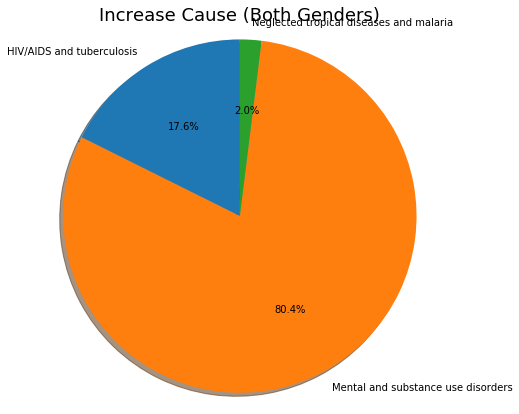

In [37]:
str1 = "Increase Cause (Both Genders)"
plot_pie(combined_inc_causes,"Cause Name", str1)

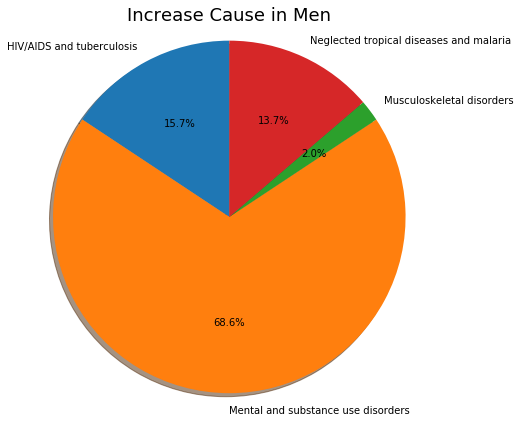

In [38]:
str1 = "Increase Cause in Men"
plot_pie(male_inc_causes,"Cause Name", str1)

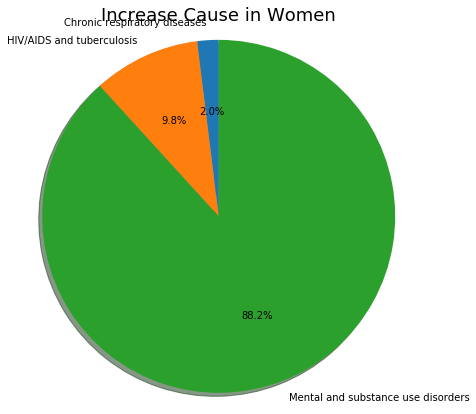

In [39]:
str1 = "Increase Cause in Women"
plot_pie(female_inc_causes,"Cause Name", str1)

<span style="color:Blue">__Comments:__ 
    
$\;\;\;\;\;\;$<span style="color:Blue">1. In 80% of the states, Mental and substance use disorders saw the biggest jump in increase in mortality. From females, the same is true for almost 88.2% of the states (19.6% higher than male).

$\;\;\;\;\;\;$<span style="color:Blue">2. "Neglected Tropical diseases and malaria is alss saw highest jump in 13.7% of the states from men.
    
$\;\;\;\;\;\;$<span style="color:Blue">3. "HIV/AIDS and Tuberculosis" is the another cause for increase in mortality 

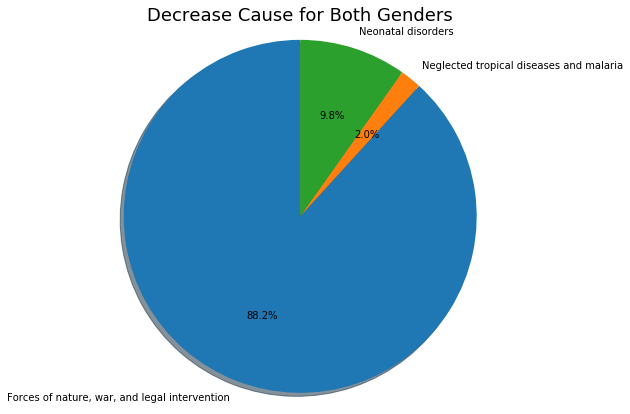

In [40]:
str1 = "Decrease Cause for Both Genders"
plot_pie(combined_dec_causes,"Cause Name", str1)

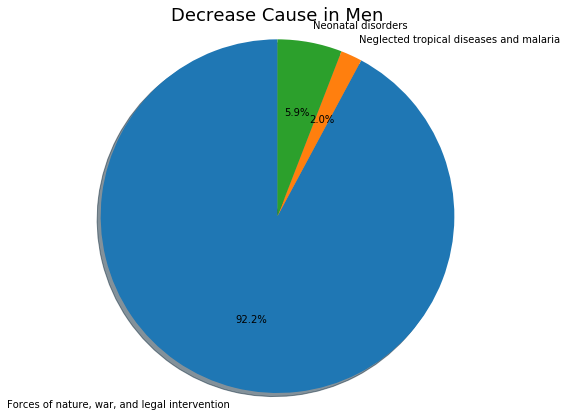

In [41]:
str1 = "Decrease Cause in Men"
plot_pie(male_dec_causes,"Cause Name", str1)

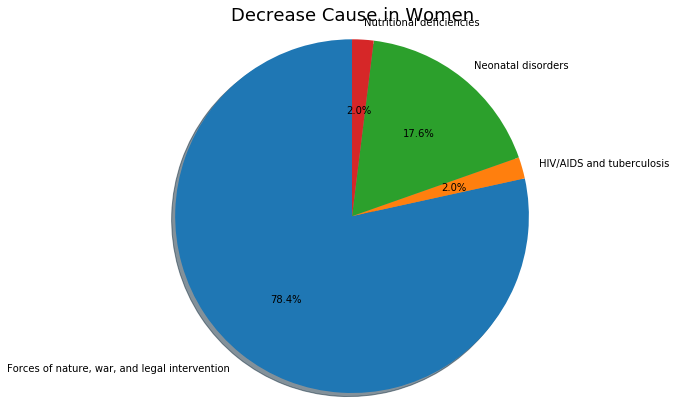

In [42]:
str1 = "Decrease Cause in Women"
plot_pie(female_dec_causes,"Cause Name", str1)

<span style="color:Blue">__Comments:__

<span style="color:Blue">$\;\;\;\;\;\;$1. "Forces of nature, war and legal intervention is the topmost cause for reduction in mortality in most of the states. 
    
<span style="color:Blue">$\;\;\;\;\;\;$2. "Neonatal disorders" has also seen a significant improvement over a period of time and hence is the reason for reduction of mortality in few states